# Cat Vs. Dog Classification: 🐈/🐕

Algorithm to distinguish between cat and dog images

### Dataset Description:


*   The dataset has been taken from [Kaggle](https://www.kaggle.com/competitions/dogs-vs-cats/data)
*   The training data contains 25,000 images of dogs and cats



### Extracting Dataset using Kaggle

In [1]:
!pip install kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Importing Dataset from Kaggle

In [2]:
#Kaggle API:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:08<00:00, 62.6MB/s]
100% 812M/812M [00:08<00:00, 100MB/s] 


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The train dataset is extracted')

The train dataset is extracted


In [12]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("No. of Images:",file_count)

No. of Images: 25000


In [14]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.6887.jpg', 'cat.3818.jpg', 'cat.8864.jpg', 'dog.1143.jpg', 'cat.10110.jpg', 'dog.9751.jpg', 'dog.11436.jpg', 'dog.3474.jpg', 'dog.9731.jpg', 'cat.5749.jpg', 'dog.11033.jpg', 'cat.9165.jpg', 'dog.3026.jpg', 'dog.8105.jpg', 'dog.9738.jpg', 'cat.5417.jpg', 'dog.5195.jpg', 'dog.11123.jpg', 'dog.4482.jpg', 'cat.566.jpg', 'cat.12232.jpg', 'dog.1529.jpg', 'cat.629.jpg', 'cat.5087.jpg', 'cat.3272.jpg', 'cat.9906.jpg', 'cat.1834.jpg', 'cat.8404.jpg', 'dog.11046.jpg', 'dog.3114.jpg', 'dog.409.jpg', 'cat.2410.jpg', 'cat.6866.jpg', 'dog.7860.jpg', 'cat.2789.jpg', 'cat.125.jpg', 'cat.5137.jpg', 'cat.10722.jpg', 'cat.9601.jpg', 'cat.10490.jpg', 'cat.9560.jpg', 'dog.9508.jpg', 'cat.10416.jpg', 'dog.11308.jpg', 'dog.7695.jpg', 'cat.2762.jpg', 'cat.5184.jpg', 'dog.2521.jpg', 'dog.3934.jpg', 'dog.11421.jpg', 'cat.7651.jpg', 'cat.3077.jpg', 'dog.178.jpg', 'dog.4365.jpg', 'cat.3085.jpg', 'cat.4310.jpg', 'cat.7780.jpg', 'cat.6249.jpg', 'cat.10721.jpg', 'dog.6824.jpg', 'cat.943.jpg', 'dog.3774.jpg', '

### Importing The Dependencies

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images:

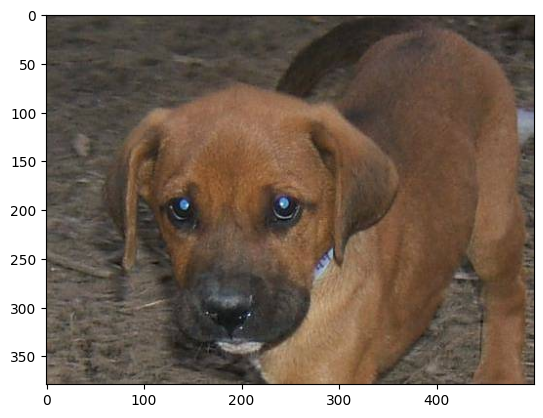

In [17]:
#Dog image
img = mpimg.imread('/content/train/dog.637.jpg')
imgplt = plt.imshow(img);

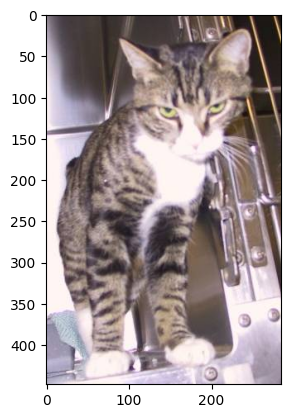

In [20]:
#Cat image
img = mpimg.imread('/content/train/cat.10110.jpg')
imgplt = plt.imshow(img);

In [21]:
file_names = os.listdir('/content/train')

for i in range(5):
  names = file_names[i]
  print(names[:3])

dog
cat
cat
dog
cat


In [23]:
file_names = os.listdir('/content/train')

dog_cnt = 0
cat_cnt = 0
for i in file_names:
  name = i[:3]
  if name == "dog":
    dog_cnt += 1
  else:
    cat_cnt += 1

print('Number of dog images =', dog_cnt)
print('Number of cat images =', cat_cnt)

Number of dog images = 12500
Number of cat images = 12500


### Resizing the images

In [24]:
#Creating a directory for resized images
os.mkdir('/content/image resized')

In [25]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(3000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

Displaying the resized images

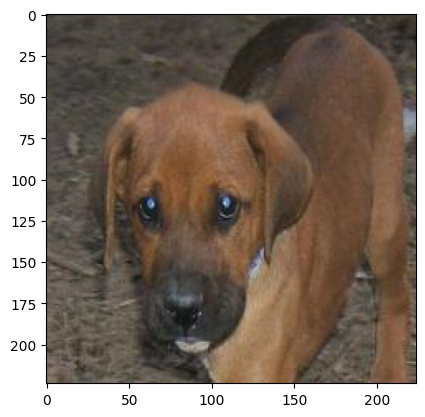

In [26]:
#Dog resized image
img = mpimg.imread('/content/image resized/dog.637.jpg')
imgplt = plt.imshow(img);

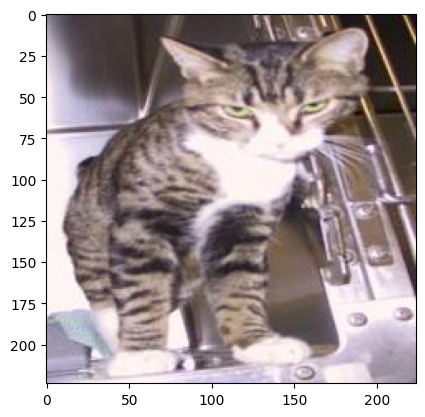

In [27]:
#Cat image
img = mpimg.imread('/content/image resized/cat.10110.jpg')
imgplt = plt.imshow(img);

### Creating labels for images:


*   Cat --> 0
*   Dog --> 1



In [29]:
filenames = os.listdir('/content/image resized/')

labels=[]

for i in range(3000):
  filename = filenames[i]
  label = filename[:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [30]:
print(filenames[0:5])
print(len(filenames))

['dog.6887.jpg', 'cat.3818.jpg', 'cat.8864.jpg', 'dog.1143.jpg', 'cat.10110.jpg']
3000


In [31]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 0]
3000


In [32]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1493 1507]


### Converting all resized images into numpy arrays

In [33]:
import cv2
import glob

In [34]:
image_dir = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [38]:
print(dog_cat_images)

[[[[137 130 133]
   [105  99 100]
   [ 44  38  39]
   ...
   [ 43  37  30]
   [ 43  37  30]
   [ 43  37  30]]

  [[157 150 153]
   [122 115 118]
   [ 74  68  69]
   ...
   [ 48  42  35]
   [ 46  40  33]
   [ 45  39  32]]

  [[167 161 166]
   [110 105 107]
   [ 74  69  70]
   ...
   [ 59  53  46]
   [ 59  53  46]
   [ 59  53  46]]

  ...

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  9  14  29]
   [  8   8  24]
   [ 22  23  37]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  5  10  25]
   [  6   6  22]
   [ 20  21  35]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  2   7  22]
   [  3   3  19]
   [ 18  19  33]]]


 [[[104 111 106]
   [113 120 115]
   [119 125 120]
   ...
   [ 62  73  71]
   [ 66  77  75]
   [ 72  85  83]]

  [[109 116 111]
   [118 125 120]
   [125 131 126]
   ...
   [ 48  59  57]
   [ 53  64  62]
   [ 60  73  71]]

  [[109 116 111]
   [116 123 118]
   [123 129 124]
   ...
   [ 52  63  61]
   [ 58  69  67]
   [ 66  79

In [39]:
type(dog_cat_images), dog_cat_images.shape

(numpy.ndarray, (3000, 224, 224, 3))

In [40]:
X = dog_cat_images
Y = np.asarray(labels)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
X.shape, X_train.shape, X_test.shape

((3000, 224, 224, 3), (2400, 224, 224, 3), (600, 224, 224, 3))



*   2400 --> Training images
*   600 --> Test images



In [45]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [46]:
X_train_scaled

array([[[[0.35294118, 0.38823529, 0.42745098],
         [0.36078431, 0.39607843, 0.43529412],
         [0.35294118, 0.38823529, 0.42745098],
         ...,
         [0.26666667, 0.29411765, 0.2745098 ],
         [0.20392157, 0.22745098, 0.20784314],
         [0.17647059, 0.20392157, 0.17647059]],

        [[0.34117647, 0.37647059, 0.41568627],
         [0.34901961, 0.38431373, 0.42352941],
         [0.34117647, 0.37647059, 0.41568627],
         ...,
         [0.37647059, 0.40392157, 0.39215686],
         [0.35294118, 0.37647059, 0.35686275],
         [0.34117647, 0.36862745, 0.34117647]],

        [[0.33333333, 0.36862745, 0.40784314],
         [0.3372549 , 0.37254902, 0.41176471],
         [0.34117647, 0.36862745, 0.40392157],
         ...,
         [0.4745098 , 0.49411765, 0.48627451],
         [0.48627451, 0.50196078, 0.48235294],
         [0.48627451, 0.50196078, 0.48235294]],

        ...,

        [[0.31372549, 0.38823529, 0.4       ],
         [0.29411765, 0.36862745, 0.38039216]

## Building the Neural Network

In [47]:
import tensorflow as tf
import tensorflow_hub as hub

Link for model: [mobilenet model](https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4)

In [48]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [49]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [51]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [52]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
75/75 [==============================] - 15s 39ms/step - loss: 0.1516 - acc: 0.9429
Epoch 2/5
75/75 [==============================] - 3s 39ms/step - loss: 0.0606 - acc: 0.9775
Epoch 3/5
75/75 [==============================] - 3s 40ms/step - loss: 0.0518 - acc: 0.9787
Epoch 4/5
75/75 [==============================] - 3s 41ms/step - loss: 0.0343 - acc: 0.9892
Epoch 5/5
75/75 [==============================] - 3s 40ms/step - loss: 0.0291 - acc: 0.9933


In [53]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

19/19 [==============================] - 2s 71ms/step - loss: 0.0906 - acc: 0.9717
Test Loss = 0.0906297042965889
Test Accuracy = 0.971666693687439


# Predictive System

Path of the image to be predicted: /content/dog-puppy-on-garden-royalty-free-image-1586966191.jpg


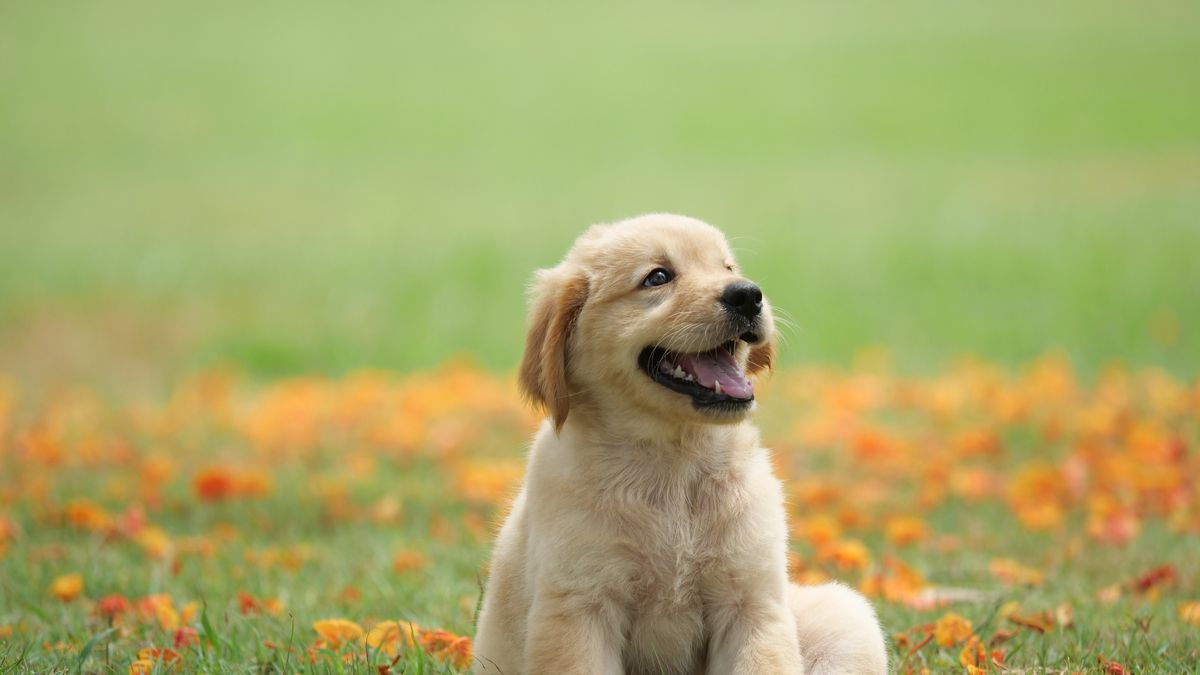

1/1 [==============================] - 1s 1s/step
[[-3.1123445  1.992422 ]]
1
The image represents a Dog


In [54]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/qtt6q1d6-720.jpg


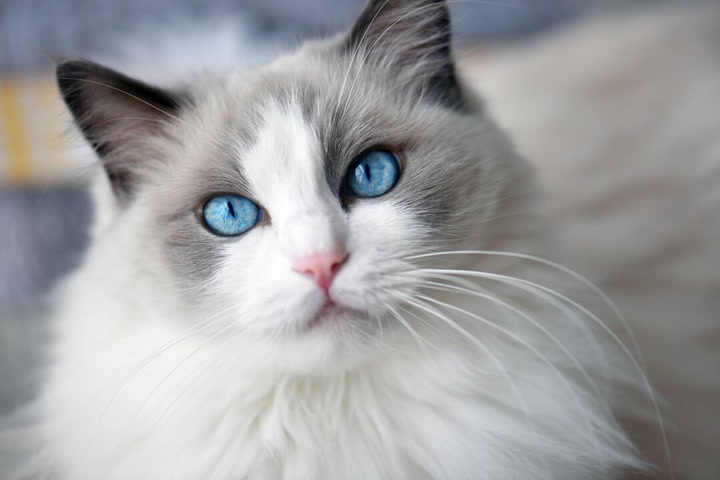

1/1 [==============================] - 0s 58ms/step
[[ 4.3044944 -4.6340184]]
0
The image represents a Cat


In [55]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')